In [1]:
from tensorflow.keras.datasets.mnist import load_data

mnist = load_data()
(x_train, y_train), (x_test, y_test) =  mnist
x_flatten_train = x_train.reshape(60000, 28*28)
x_flatten_test = x_test.reshape(10000, 28*28)

In [2]:
x_flatten_train.shape

(60000, 784)

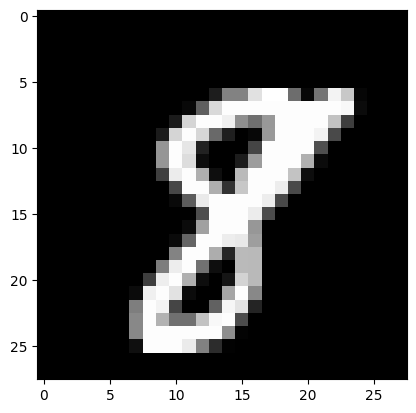

In [4]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[55], cmap="gray")

In [6]:
import pprint

pprint.pprint(x_train[55])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
x_train[0].shape

(28, 28)

In [5]:
y_train[55]

8

In [ ]:
# tf.keras.Sequential(
#     layers=None, trainable=True, name=None
# )

# tf.keras.layers.ReLU(
#     max_value=None, negative_slope=0.0, threshold=0.0, **kwargs
# )
from tensorflow.keras import Sequential , Input
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import ReLU ,Dense ,Softmax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical


y_train_onehot = to_categorical(y_train , num_classes=10)
y_test_onehot = to_categorical(y_test , num_classes=10)

relu = ReLU()
softmax = Softmax()

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512 , activation=relu))
model.add(Dense(10 , activation=softmax))


categorical_crossentropy = CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='categorical_crossentropy'
)

model.compile(loss=categorical_crossentropy , optimizer='adam', metrics=['accuracy'])

model.fit(x_flatten_train , y_train_onehot , epochs=20 , batch_size=128)

model.evaluate(x_flatten_test, y_test_onhot)

In [9]:
model.evaluate()

313/313 [==============================] - 2s 5ms/step - loss: 0.6129 - accuracy: 0.9680


[0.6128838062286377, 0.9679999947547913]

In [16]:
model.predict(x_flatten_test[15])

TypeError: in user code:

    File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5444, in softmax
        if x.shape.rank <= 1:

    TypeError: Exception encountered when calling layer 'softmax_1' (type Softmax).
    
    '<=' not supported between instances of 'NoneType' and 'int'
    
    Call arguments received by layer 'softmax_1' (type Softmax):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None


In [15]:
y_test[15]

5